# Overview

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?

$H_0$ = Average latency with new internet service provider is the same or down compared to the average latency of the old internet service provider.

$H_a$ = Average latency with new internet service provider is up compared to the average latency of the old internet service provider.

**True Positive**: The average latency is up with the new internet service provider.

**True Negative**: The average latency with new internet service provider is the same or down.

**Type I Error**: The results say the average latency is the same or down, but it is really up. 

**Type II Error**: The results say the average latency is up, but it is really the same or down.

# Maggie's answers

$H_0$ = $\mu_{latency_a} \leq \mu_{latency_b}$

$H_a$ = $\mu_{latency_a} > \mu_{latency_b}$

**True Positive**: latency went up and we said it did

**True Negative**: latency didn't go up and we said it didn't

**Type I Error**: latency didn't go up, but we said it did.

**Type II Error**: latency did go up, but we said it didn't.

### Is the website redesign any good?

$H_0$ = The average website session length was the same or down after the redesign.

$H_a$ = There is a higher average website session length after  than before the redesign.

**True Positive**: The average website session length is higher after the redesign.

**True Negative**: The average website session length was the same or down after the redesign.

**Type I Error**: The results say there is no difference in average website session length, but there is.

**Type II Error**: The results say there is a higher average, but there isn't.

# Maggie's answers

$H_0$ = $\mu_{time_{old}} \geq \mu_{time_{new}}$

$H_a$ = $\mu_{time_{old}} < \mu_{time_{new}}$

**True Positive**: visitors spend more time and we said that

**True Negative**: visitors spend less or equal time and we said that.

**Type I Error**: We said the site is better, but it's not.

**Type II Error**: We said the site is not better, but it is. 

### Is our television ad driving more sales?

$H_0$ = Sales were the same or down before and after the television add.

$H_a$ = Our television ad leads to more sales.

**True Positive**: Our television ad increased sales.

**True Negative**: Sales were the same or down before and after the television add.

**Type I Error**: The results say that sales were the same or down after the ad, but really were up.

**Type II Error**: The results say that sales were up, but the sales were actually the same or down.

# Maggie's answers

$H_0$ = $\mu_{sales_{pre}} \geq \mu_{sales_{post}}$

$H_a$ = $\mu_{sales_{pre}} < \mu_{sales_{post}}$

**True Positive**: Post ad sales are higher, and we said they would.

**True Negative**: Post ad sales didn't increase, and we said they wouldn't 

**Type I Error**: Post ad sales are not higher, but we said they are

**Type II Error**: Post ad sales increased, but we said it didn't

# T-Test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from math import sqrt

from scipy import stats
from pydataset import data


from env import get_db_url

### 1. Answer with the type of test you would use (assume normal distribution):
- Is there a difference in grades of students on the second floor compared to grades of all students? **One-sample ttest two-tail**

- Are adults who drink milk taller than adults who dont drink milk? **Independent ttest one-tail**

- Is the the price of gas higher in Texas or in New Mexico? **Independent ttest One-tail**

- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy? **ANOVA**

### 2. Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 

**Set Hypothesis**

$H_{0}$: There is no difference in average time it takes to sell a home between offices.

$H_{a}$: There is a difference in average time it takes to sell a home between offices.

### A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days.

In [106]:
office1 = stats.norm(90,15).rvs(40)
office1

array([105.81969329, 109.92518818,  88.46013524,  97.44168139,
        82.63738012,  94.68224625,  79.02691137,  87.83822428,
       101.05330788,  66.37516821,  66.37681505,  95.72610728,
        97.41711318, 106.41462305, 103.3162847 ,  89.51786299,
        87.46575881,  93.38517675,  80.36260127,  98.35250976,
       112.83910662,  76.7354813 , 108.99101723,  73.24523662,
       110.93632566,  80.72021734,  67.71899811, 103.98043838,
        66.49970628,  77.05241938,  86.81130827,  80.60636119,
        88.7186356 ,  93.95921925, 108.18387826,  89.12240948,
        97.23580232,  57.01635425, 108.26202787,  98.09858606])

### A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [107]:
office2 = stats.norm(100,20).rvs(50)
office2

array([ 71.55694729,  93.28061078,  90.35351188,  65.28502898,
       126.86122399, 101.24965206,  97.1838577 , 108.14560788,
       102.3794396 ,  85.20410696,  91.52544197,  95.4151588 ,
       118.45539886,  95.77944526,  91.42214849, 106.79692154,
       117.59479814, 157.04125821, 112.27791703,  96.48503356,
       124.05215347, 105.29313247,  99.88761488, 118.92940188,
       115.10461321, 111.49344677, 106.37533907, 117.72319691,
       104.50068892, 109.90363844, 119.91798847, 127.20672163,
       109.9967125 , 110.26598064, 124.16235407, 119.12804583,
       103.5723138 , 142.83157292,  87.64141643,  87.59793753,
        95.14640328, 115.17139113, 128.19887   , 106.31459267,
        95.8726227 ,  95.32530729,  81.49509618,  85.06323786,
        91.36707095, 119.42728087])

In [108]:
stats.levene(office1, office2)

LeveneResult(statistic=0.4981026285032792, pvalue=0.4821991849867847)

In [102]:
alpha = 0.05

In [103]:
tstat, pval = stats.ttest_ind(office1, office2)

tstat, pval

(-3.928158000468648, 0.00016987508156845514)

**Decide**

Is $p < \alpha$ 

In [109]:
if (pval < alpha):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

we can reject the null hypothesis


**We can assume there is a difference in average time to sell a home between the two offices.**

### 3. Load the mpg dataset and use it to answer the following questions:

In [50]:
mpg = data('mpg')

In [3]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [4]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [5]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [51]:
#Clean up data
mpg.rename(columns={'cty': 'city'}, inplace=True)
mpg.rename(columns={'hwy': 'highway'}, inplace=True)

In [52]:
#add column for overall average mpg
mpg['average_mileage'] = round(2 / ((1/mpg.highway) + (1/mpg.city)), 2)

In [53]:
#add column for automatic = True manual = False
mpg['is_automatic'] = mpg.trans.str.contains('auto')

In [54]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,city,highway,fl,class,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.21,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.36,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.31,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.71,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.81,True


###  Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

**A. Plot Distribution**

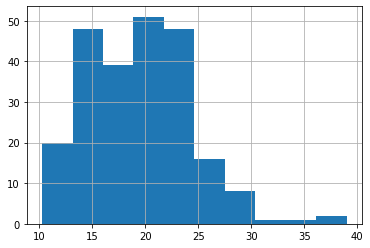

In [14]:
mpg.average_mileage.hist();

In [29]:
cars_2008 = mpg.average_mileage[mpg.year == 2008]
cars_1999 = mpg.average_mileage[mpg.year == 1999]

In [30]:
cars_1999.mean(), cars_2008.mean()

(19.681452991452982, 19.488632478632482)

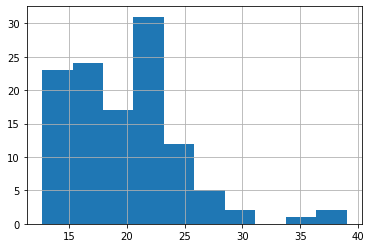

In [113]:
cars_1999.hist();

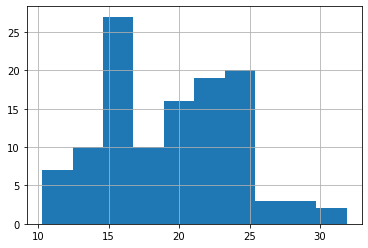

In [114]:
cars_2008.hist();

**B. Set Hypothesis**

$H_{0}$: There is no difference in fuel-efficiency in cars from 2008 vs. 1999.

$H_{a}$: There is a difference in fuel-efficiency in cars from 2008 vs. 1999.

**C. Set Alpha**

see above

**D. Verify Assumptions**

**Independent:** Yes. Two separate years 2008 and 1999

**Normal distribution:** Yes. Enough observations

**Equal variances:** Check $\Downarrow$

In [31]:
stats.levene(cars_2008, cars_1999)

LeveneResult(statistic=0.030963028454038196, pvalue=0.8604763910415811)

pvalue > 0.5 sooooo they are equal enough

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.____________
- For a 2-tailed test where our alternative hypothesis is testing ==, we evaluate 𝑝 < 𝛼. 

In [116]:
tstat, pval = stats.ttest_ind(cars_2008, cars_1999)

In [117]:
tstat, pval

(-0.29976841281243016, 0.7646222117552022)

**F. Decide**

Is $p < \alpha$ (*two-tailed test because checking for difference.*)

In [118]:
if (pval < alpha):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


**From our evaluation we can assume cars made in 2008 and cars in 1999 have no difference in fuel-efficiency.**

### Are compact cars more fuel-efficient than the average car?


Continuous: fuel-efficiency 
Discrete: car class

sample mean (compact cars) 
pop mean (all cars)

In [82]:
sample_mean = mpg.average_mileage[mpg["class"] == 'compact']
pop_mean = mpg.average_mileage.mean()

**A. Plot Distribution**

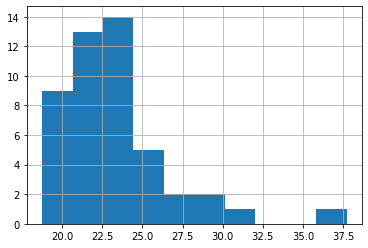

In [120]:
sample_mean.hist();

**B. Set Hypothesis**

$H_{0}$: Compact cars average_mileage $\leq$ all cars average_mileage.

$H_{a}$: Compact cars average_mileage > all cars average_mileage.

**C. Set Alpha**

see above

**D. Verify Assumptions**

**Independent:** No. Comparing sample mean to theoretical mane

**Normal distribution:** Check $\Downarrow$

In [122]:
sample_mean.count()

47

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.____________
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [84]:
tstat, pval = stats.ttest_1samp(sample_mean, pop_mean)

In [85]:
tstat, pval

(7.511735749827195, 1.56511388307498e-09)

**F. Decide**

Is $t > 0$ and $p/2 < \alpha$

In [86]:
if ((pval / 2) < alpha) and (tstat > 0):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

we can reject the null hypothesis


There appears to be a significance between mpg and being a compact car.

### Do manual cars get better gas mileage than automatic cars?

Continuous: fuel-efficiency 
Discrete: is_automatic (True/False)

group 1: manual
group 2: auto

In [87]:
manual_mpg = mpg.average_mileage[mpg.is_automatic == False]
auto_mpg = mpg.average_mileage[mpg.is_automatic == True]

**A. Plot Distribution**

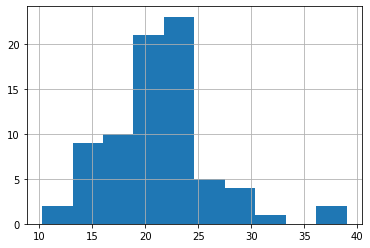

In [124]:
manual_mpg.hist();

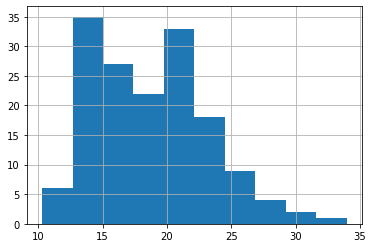

In [126]:
auto_mpg.hist();

**B. Set Hypothesis**

$H_{0}$: Manual car average_mileage $\leq$ automatic car average_mileage

$H_{a}$: Manual car average_mileage > automatic car average_mileage

**C. Set Alpha**

see above

**D. Verify Assumptions**

**Independent:** Yes. automatic and manual

**Normal distribution:** Yes. Enough observations

**Equal variances:** Check $\Downarrow$

In [88]:
stats.levene(manual_mpg, auto_mpg)

LeveneResult(statistic=0.013710906098481107, pvalue=0.9068872019462125)

pvalue > 0.5 sooooo we can assume equal variances

**E. Compute test statistic and probability (t-statistic & p-value)**

- scipy.stats.____________
- For a 1-tailed test where our alternative hypothesis is testing for "greater than", we evaluate 𝑝/2 < 𝛼  and  𝑡 > 0. 

In [89]:
tstat, pval = stats.ttest_ind(manual_mpg, auto_mpg)

In [90]:
tstat, pval

(4.652099934834949, 5.522151036980458e-06)

**F. Decide**

Is $t > 0$ and $p/2 < \alpha$

In [91]:
if ((pval / 2) < alpha) and (tstat > 0):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

we can reject the null hypothesis


We can assume that manual cars have better fuel efficiency than automatic cars.

# Correlation

### 1. Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot? **Pearson's R**
- Do guys and gals quit their jobs at the same rate? **2 sample two-tailed ttest**
- Does the length of time of the lecture correlate with a students grade? **Pearson's R**

### 2. Use the telco_churn data.

In [23]:
telco_churn_df =  pd.read_sql('''
SELECT c.customer_id, phone_service, ist.internet_service_type, monthly_charges, tenure, total_charges, churn
FROM customers c
JOIN internet_service_types ist USING(internet_service_type_id);
''', get_db_url('telco_churn'))

In [130]:
telco_churn_df.head()

,customer_id,phone_service,internet_service_type,monthly_charges,tenure,total_charges,churn
0,0002-ORFBO,Yes,DSL,65.6,9,593.3,No
1,0003-MKNFE,Yes,DSL,59.9,9,542.4,No
2,0004-TLHLJ,Yes,Fiber optic,73.9,4,280.85,Yes
3,0011-IGKFF,Yes,Fiber optic,98.0,13,1237.85,Yes
4,0013-EXCHZ,Yes,Fiber optic,83.9,3,267.4,Yes


In [154]:
telco_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7043 non-null   object 
 1   phone_service          7043 non-null   object 
 2   internet_service_type  7043 non-null   object 
 3   monthly_charges        7043 non-null   float64
 4   tenure                 7043 non-null   int64  
 5   total_charges          7043 non-null   object 
 6   churn                  7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

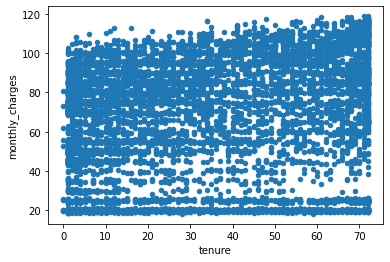

In [76]:
telco_churn_df.plot.scatter(y='monthly_charges', x='tenure')

#### Does tenure correlate with monthly charges?

$H_{0}$: There is no linear correlation between tenure and monthly charges

$H_{a}$: There is a linear correlation between tenure and monthly charges

In [212]:
r, p = stats.pearsonr(telco_churn_df.tenure, telco_churn_df.monthly_charges)
r, p

(0.24789985628615008, 4.0940449915016345e-99)

- 0: No relationship
- 0 - 0.2: Weak positive relationship
- **0.2 - 0.4: Moderate positive relationship**
- 0.4 - 1: Strong positive relationship

_________________________________________
- 0 - -0.2: Weak negative relationship
- -0.2 - -0.4: Moderate negative relationship
- -0.4 - -1: Strong negative relationship

In [213]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


#### Total charges?

In [24]:
telco_total_charges_fix = telco_churn_df[(telco_churn_df['tenure'] != 0)]

In [74]:
telco_total_charges_fix.shape

(7032, 7)

In [75]:
telco_total_charges_fix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            7032 non-null   object 
 1   phone_service          7032 non-null   object 
 2   internet_service_type  7032 non-null   object 
 3   monthly_charges        7032 non-null   float64
 4   tenure                 7032 non-null   int64  
 5   total_charges          7032 non-null   float64
 6   churn                  7032 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 697.5+ KB


In [28]:
telco_total_charges_fix['total_charges'] = telco_total_charges_fix['total_charges'].astype(float)

/var/folders/hj/mq308hhs3rz5q1mbkdf0261m0000gn/T/ipykernel_51817/3032141836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telco_total_charges_fix['total_charges'] = telco_total_charges_fix['total_charges'].astype(float)


In [214]:
r, p = stats.pearsonr(telco_total_charges_fix.tenure, telco_total_charges_fix.total_charges)
r, p

(0.825880460933202, 0.0)

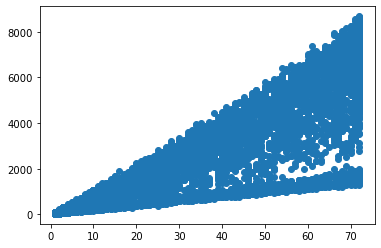

In [176]:
plt.scatter(x=telco_total_charges_fix.tenure, y=telco_total_charges_fix.total_charges)

- 0: No relationship
- 0 - 0.2: Weak positive relationship
- 0.2 - 0.4: Moderate positive relationship
- **0.4 - 1: Strong positive relationship**

_________________________________________
- 0 - -0.2: Weak negative relationship
- -0.2 - -0.4: Moderate negative relationship
- -0.4 - -1: Strong negative relationship

In [215]:
#evaluate p-value
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


#### What happens if you control for phone and internet service?

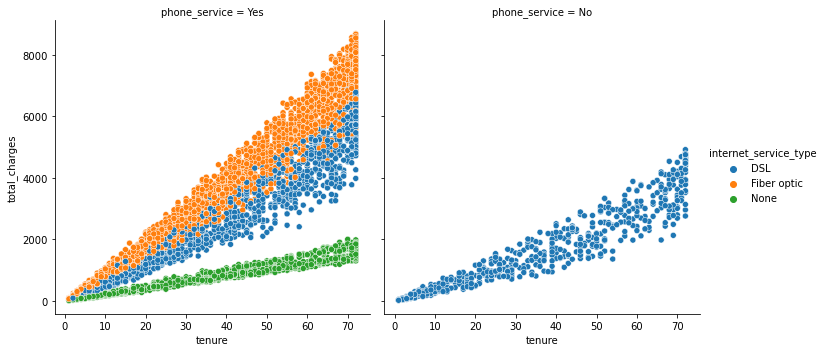

In [30]:
sns.relplot(data=telco_total_charges_fix, x='tenure', y='total_charges', col='phone_service', hue='internet_service_type');

In [31]:
ph_yes = telco_total_charges_fix[telco_total_charges_fix.phone_service== 'Yes']
ph_no = telco_total_charges_fix[telco_total_charges_fix.phone_service== 'No']

### Has Phone service

In [32]:
r, p = stats.pearsonr(ph_yes.tenure, ph_yes.total_charges)
r, p

(0.829839321069941, 0.0)

- 0: No relationship
- 0 - 0.2: Weak positive relationship
- 0.2 - 0.4: Moderate positive relationship
- **0.4 - 1: Strong positive relationship**

_________________________________________
- 0 - -0.2: Weak negative relationship
- -0.2 - -0.4: Moderate negative relationship
- -0.4 - -1: Strong negative relationship

### No Phone service

In [33]:
r, p = stats.pearsonr(ph_no.tenure, ph_no.total_charges)
r, p

(0.9534228506954516, 0.0)

- 0: No relationship
- 0 - 0.2: Weak positive relationship
- 0.2 - 0.4: Moderate positive relationship
- **0.4 - 1: Strong positive relationship**

_________________________________________
- 0 - -0.2: Weak negative relationship
- -0.2 - -0.4: Moderate negative relationship
- -0.4 - -1: Strong negative relationship

### DSL

In [34]:
ist_dsl = telco_total_charges_fix[telco_total_charges_fix.internet_service_type== 'DSL']


In [35]:
r, p = stats.pearsonr(ist_dsl.tenure, ist_dsl.total_charges)
r, p

(0.9411848215629786, 0.0)

- 0: No relationship
- 0 - 0.2: Weak positive relationship
- 0.2 - 0.4: Moderate positive relationship
- **0.4 - 1: Strong positive relationship**

_________________________________________
- 0 - -0.2: Weak negative relationship
- -0.2 - -0.4: Moderate negative relationship
- -0.4 - -1: Strong negative relationship

### Fiber optic

In [37]:
ist_fib = telco_total_charges_fix[telco_total_charges_fix.internet_service_type== 'Fiber optic']


In [38]:
r, p = stats.pearsonr(ist_fib.tenure, ist_fib.total_charges)
r, p

(0.9853093528070602, 0.0)

- 0: No relationship
- 0 - 0.2: Weak positive relationship
- 0.2 - 0.4: Moderate positive relationship
- **0.4 - 1: Strong positive relationship**

_________________________________________
- 0 - -0.2: Weak negative relationship
- -0.2 - -0.4: Moderate negative relationship
- -0.4 - -1: Strong negative relationship

### None

In [40]:
ist_none = telco_total_charges_fix[telco_total_charges_fix.internet_service_type== 'None']


In [41]:
r, p = stats.pearsonr(ist_none.tenure, ist_none.total_charges)
r, p

(0.9814648859044287, 0.0)

- 0: No relationship
- 0 - 0.2: Weak positive relationship
- 0.2 - 0.4: Moderate positive relationship
- **0.4 - 1: Strong positive relationship**

_________________________________________
- 0 - -0.2: Weak negative relationship
- -0.2 - -0.4: Moderate negative relationship
- -0.4 - -1: Strong negative relationship

**Conclusion:** There is no difference if they have phone service or not, nor what kind of internet service provider, all have tenure and total_charges all have a strong positive relationship.

In [44]:
#define correlation function 
def corr_fun(df):
    return pd.Series(stats.pearsonr(df.tenure, df.total_charges),
                    index=['r','p'])

In [45]:
telco_total_charges_fix.groupby(['internet_service_type', 'phone_service']).apply(corr_fun)

r    p
internet_service_type phone_service               
DSL                   No             0.953423  0.0
                      Yes            0.970533  0.0
Fiber optic           Yes            0.985309  0.0
None                  Yes            0.981465  0.0

### 3. Use the employees database.

- Is there a relationship between how long an employee has been with the company and their salary?

In [132]:
employee_salary_df =  pd.read_sql('''
SELECT e.emp_no, hire_date, salary
FROM employees e
JOIN salaries s USING(emp_no)
WHERE to_date > CURDATE();
''', get_db_url('employees'))

In [183]:
employee_salary_df.head()

,emp_no,hire_date,salary,days_since_hired
0,10001,1986-06-26,88958,13251
1,10002,1985-11-21,72527,13468
2,10003,1986-08-28,43311,13188
3,10004,1986-12-01,74057,13093
4,10005,1989-09-12,94692,12077


In [182]:
employee_salary_df['days_since_hired'] = (datetime.date.today() - employee_salary_df['hire_date']).dt.days

In [184]:
r, p = stats.pearsonr(employee_salary_df.days_since_hired, employee_salary_df.salary)
r, p

(0.3064625613186078, 0.0)

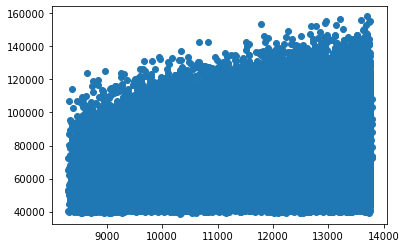

In [186]:
plt.scatter(x=employee_salary_df.days_since_hired, y= employee_salary_df.salary);

- 0: No relationship
- 0 - 0.2: Weak positive relationship
- **0.2 - 0.4: Moderate positive relationship**
- 0.4 - 1: Strong positive relationship

_________________________________________
- 0 - -0.2: Weak negative relationship
- -0.2 - -0.4: Moderate negative relationship
- -0.4 - -1: Strong negative relationship

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [4]:
employee_title_df =  pd.read_sql('''
SELECT e.emp_no, hire_date, COUNT(title) as title_count
FROM employees e
JOIN titles t USING(emp_no)
GROUP BY e.emp_no, hire_date;
''', get_db_url('employees'))

In [5]:
employee_title_df.head()

,emp_no,hire_date,title_count
0,10001,1986-06-26,1
1,10002,1985-11-21,1
2,10003,1986-08-28,1
3,10004,1986-12-01,2
4,10005,1989-09-12,2


In [200]:
employee_title_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   emp_no       300024 non-null  int64 
 1   hire_date    300024 non-null  object
 2   title_count  300024 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.9+ MB


In [71]:
employee_title_df['days_since_hired'] = (datetime.date.today() - employee_title_df['hire_date']).dt.days

In [7]:
employee_title_df.head()

,emp_no,hire_date,title_count,days_since_hired
0,10001,1986-06-26,1,13252
1,10002,1985-11-21,1,13469
2,10003,1986-08-28,1,13189
3,10004,1986-12-01,2,13094
4,10005,1989-09-12,2,12078


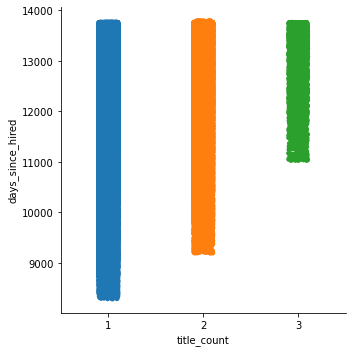

In [21]:
sns.catplot(data=employee_title_df, x='title_count', y='days_since_hired');

In [204]:
r, p = stats.pearsonr(employee_title_df.title_count, employee_title_df.days_since_hired)
r, p

(0.2665989299136619, 0.0)

- 0: No relationship
- 0 - 0.2: Weak positive relationship
- **0.2 - 0.4: Moderate positive relationship**
- 0.4 - 1: Strong positive relationship

_________________________________________
- 0 - -0.2: Weak negative relationship
- -0.2 - -0.4: Moderate negative relationship
- -0.4 - -1: Strong negative relationship

### 4. Use the sleepstudy data.
- Is there a relationship between days and reaction time?

In [80]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


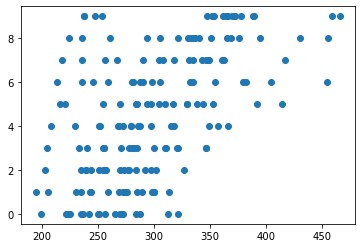

In [81]:
plt.scatter(x=sleepstudy.Reaction, y=sleepstudy.Days);

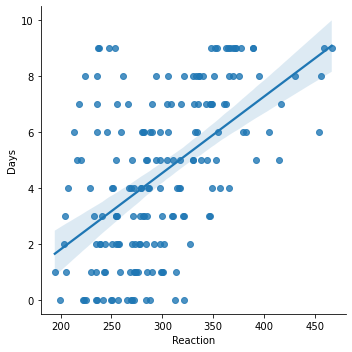

In [82]:
sns.lmplot(data=sleepstudy, x="Reaction", y="Days");

In [211]:
r, p = stats.pearsonr(sleepstudy.Reaction, sleepstudy.Days)
r, p

(0.5352302262650253, 9.894096322214812e-15)

- 0: No relationship
- 0 - 0.2: Weak positive relationship
- 0.2 - 0.4: Moderate positive relationship
- **0.4 - 1: Strong positive relationship**

_________________________________________
- 0 - -0.2: Weak negative relationship
- -0.2 - -0.4: Moderate negative relationship
- -0.4 - -1: Strong negative relationship

# Chi Square

### 1. Answer with the type of stats test you would use (assume normal distribution):
- Do students get better test grades if they have a rubber duck on their desk?**one sample one-tailed ttest**
- Does smoking affect whether or not someone has lung cancer?**$\chi^2$**
- Is gender independent of a person’s blood type?**$\chi^2$**
- A farming company wants to know if a new fertilizer has improved crop yield or not **two sample one-tailed ttest**
- Does the length of time of the lecture correlate with a students grade?**$\chi^2$**
- Do people with dogs live in apartments more than people with cats?**$\chi^2$**

### 2. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [49]:
cool_df = pd.DataFrame(np.array([[49, 20],[1,30]]),columns=['codeup','not_codeup'], index=['use_mac','no_use_mac'])
cool_df

,codeup,not_codeup
use_mac,49,20
no_use_mac,1,30


In [86]:
chi2, p, degf, expected = stats.chi2_contingency(cool_df)

In [90]:
print('Observed\n')
print(cool_df.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34.5 34.5]
 [15.5 15.5]]
---

chi^2 = 36.6526
p     = 0.0000


### 3. Choose another 2 categorical variables from the mpg dataset and perform a $\chi^2$ contingency table test with them. Be sure to state your null and alternative hypotheses.

In [60]:
#research data for other categorical variables
mpg.keys()

Index(['manufacturer', 'model', 'displ', 'year', 'cyl', 'trans', 'drv', 'city',
       'highway', 'fl', 'class', 'average_mileage', 'is_automatic'],
      dtype='object')

In [59]:
mpg.drv.unique()

array(['f', '4', 'r'], dtype=object)

In [61]:
mpg.cyl.unique()

array([4, 6, 8, 5])

**B. Set Hypothesis**

$H_{0}$: Drive is independent of number of cylinders

$H_{a}$: Drive is dependent of number of cylinders

In [95]:
drv_cyl = pd.crosstab(mpg.drv, mpg.cyl)
drv_cyl

cyl,4,5,6,8
drv,,,,
4,23,0,32,48
f,58,4,43,1
r,0,0,4,21


In [96]:
chi2, p, degf, expected = stats.chi2_contingency(drv_cyl)

In [97]:
print('Observed\n')
print(drv_cyl.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[23  0 32 48]
 [58  4 43  1]
 [ 0  0  4 21]]
---
Expected

[[35.65384615  1.76068376 34.77350427 30.81196581]
 [36.69230769  1.81196581 35.78632479 31.70940171]
 [ 8.65384615  0.42735043  8.44017094  7.47863248]]
---

chi^2 = 98.1355
p     = 0.0000


### 4. Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

**Set Hypothesis**

$H_{0}$: Gender is independent of whether the employee works in sales or marketing

$H_{a}$: Gender is dependent of whether the employee works in sales or marketing

In [68]:
#get the data
employee_gender_dept_df =  pd.read_sql('''
SELECT e.emp_no, gender, dept_name
FROM employees e
JOIN dept_emp de USING(emp_no)
JOIN departments d USING (dept_no)
WHERE de.to_date > CURDATE();
''', get_db_url('employees'))

In [69]:
employee_gender_dept_df.head()

,emp_no,gender,dept_name
0,10038,M,Customer Service
1,10049,F,Customer Service
2,10060,M,Customer Service
3,10088,F,Customer Service
4,10112,F,Customer Service


In [114]:
sales_market = employee_gender_dept_df\
[(employee_gender_dept_df.dept_name == 'Sales')\
 | (employee_gender_dept_df.dept_name == 'Marketing')]

In [115]:
gender_dept = pd.crosstab(sales_market.gender, sales_market.dept_name)

In [116]:
gender_dept

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [117]:
chi2, p, degf, expected = stats.chi2_contingency(gender_dept)

In [118]:
print('Observed\n')
print(drv_cyl.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 7007 24533  5014  5147  5864 21393  5872  6181 14999]
 [10562 36853  7423  7751  8978 31911  8674  9260 22702]]
---
Expected

[[ 5893.2426013 14969.7573987]
 [ 8948.7573987 22731.2426013]]
---

chi^2 = 0.3240
p     = 0.5692


**Decide**

Is $p < \alpha$ ?

$\alpha$ = 0.05

From our $\chi^2$ test we see $p > \alpha$

**So we fail to reject the null hypothesis**

**Gender is independent of whether the person is in sales or marketing**

- Is an employee's gender independent of whether or not they are or have been a manager?

**Set Hypothesis**

$H_{0}$: Gender is independent of whether or not they are or have been a manager

$H_{a}$: Gender is dependent of whether or not they are or have been a manager

In [125]:
df = pd.read_sql('''
SELECT e.emp_no, gender, title
FROM employees e
JOIN titles t USING(emp_no);
''', get_db_url('employees'))

In [134]:
df['is_manager'] = df.title.str.contains('Manager')
df

,emp_no,gender,title,is_manager
0,10001,M,Senior Engineer,False
1,10002,F,Staff,False
2,10003,M,Senior Engineer,False
3,10004,M,Engineer,False
4,10004,M,Senior Engineer,False
...,...,...,...,...
443303,499997,M,Engineer,False
443304,499997,M,Senior Engineer,False
443305,499998,M,Senior Staff,False
443306,499998,M,Staff,False


In [135]:
gender_title = pd.crosstab(df.gender, df.is_manager)

In [136]:
gender_title

is_manager,False,True
gender,,
F,177211,13
M,266073,11


In [137]:
chi2, p, degf, expected = stats.chi2_contingency(gender_title)

In [138]:
print('Observed\n')
print(gender_title.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[177211     13]
 [266073     11]]
---
Expected

[[1.77214405e+05 9.59462947e+00]
 [2.66069595e+05 1.44053705e+01]]
---

chi^2 = 1.4658
p     = 0.2260


**Decide**

Is $p < \alpha$ ?

$\alpha$ = 0.05

From our $\chi^2$ test we see $p > \alpha$

**So we fail to reject the null hypothesis**

**We assume gender is independent of being a manager**